In [1]:
import scipy

In [2]:
scipy.__version__

'0.18.1'

In [3]:
scipy.__numpy_version__

'1.11.2'

In [4]:
import numpy

In [5]:
numpy.__version__

'1.11.2'

In [6]:
import matplotlib

In [7]:
matplotlib.__version__

'1.5.3'

In [8]:
matplotlib.__version__numpy__

'1.6'

In [9]:
from __future__ import division
import os
import numpy as np
import pandas as pd
from collections import OrderedDict
import pyfits
import json
from scipy.stats import lognorm, norm

import matplotlib.pyplot as plt
%matplotlib inline

## Read in Data

In [10]:
modName      = 'copl+blackb'
version      = '-01-'
det          = 'G'
detector     = 'GBM'
burst        = 'bn080916009'

data_dir = "/Users/derek/Documents/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir = "/Users/derek/Documents/KimiZ/GRBs2/analysis/LAT/%s/PYXSPEC/%s/%s/"%(burst, detector, modName)

filename = os.path.join(mod_dir, "fakeit_fitresults_%s_%s_%s_.fit"%(modName, version, det))

if os.path.exists(filename):
    pass
else:
    raise Exception, "File does not exist."


## Place data into a Pandas Data Frame called 'data'

In [11]:
f          = pyfits.open(filename)

data1      = pd.DataFrame()
for n,name in enumerate(f[1].data.columns.names):
    if 'PARAM' in name:
        data1[name]   = f[1].data[name]

# CONVERT THE DATA TYPE SO YOU DON'T HAVE ANY ISSUES.
data   = data1.astype('float64')

In [12]:
data.columns

Index([u'PARAM1', u'PARAM2', u'PARAM3', u'PARAM4', u'PARAM5'], dtype='object')

-----------------------

--------------------------

## Setting the data we wish to fit lognormal with to the variable d

#### This data is the Normalization parameter of a spectral model.  Values are close to 0.

In [13]:
param   = 'PARAM3'
     
offset  = 0
d = None
d       = (data[param] + offset)
d       = np.array(d)

### Just to show you the minimum and maximum values of the data.

In [14]:
d.min(), d.max()

(0.016333685664411082, 0.020400679117329713)

## Plotting Function

In [15]:
def do_plotting(d, offset):    
    plt.figure(figsize=(6, 4))    
    count, bins, ignored = plt.hist(d, bins = 200, normed=True, 
                                    color='grey', align='mid', 
                                    histtype='stepfilled',
                                    alpha=0.5)
    yAxUp = count.max()

    distributions   = [lognorm]
    colors          = ['red']
    linestyles      = ['--']

    pars,errs = None,None
    dist    = lognorm
    pars    = dist.fit(d)
    errs    = dist.ppf([0.15865, 0.84135], *pars)     

    x       = np.linspace(d.min(), d.max(), 1000)
    y       = dist.pdf(x, *pars)

    # BEGIN PLOTTING
    plt.plot(x, y, linestyle='--', color='red', lw=2, label='Lognorm')

    XLims = [d.min(), d.max()]
    YLims = [0, yAxUp*1.2]
    plt.xlim(*XLims)
    plt.ylim(*YLims)
    plt.legend(loc='best', fontsize=10)
    plt.title("Offset = %f"%offset, fontsize=16)
    plt.show()
    return pars, errs

---

# Plotting Data with no offset.  Lognormal does not work.

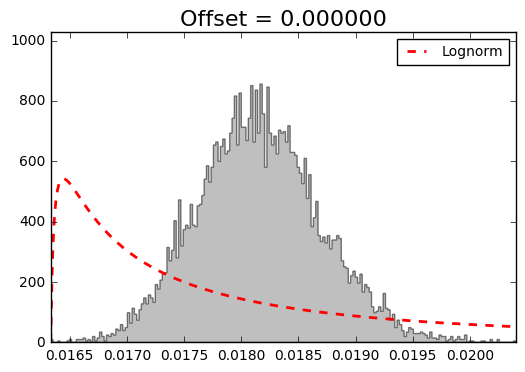

Lognormal Fit params: 
 1.658441, 0.016333, 0.001755
Errors: 
 0.016667643895629, 0.025551990747847
Data Min and Max: 
 0.016333685664411, 0.020400679117330


In [16]:
errors_o = None

param   = 'PARAM3'   
offset  = 0

d = None
d       = (data[param] + offset)
d       = np.array(d)

fitpars,errors_o = do_plotting(d, 0)

print("Lognormal Fit params: \n %f, %f, %f"%(fitpars[0], fitpars[1], fitpars[2]))
print("Errors: \n %.15f, %.15f"%((errors_o[0] - offset), (errors_o[1] - offset)))
print("Data Min and Max: \n %.15f, %.15f"%(d.min(), d.max()))      
      

---

# What offset makes the lognormal function work.

Now we'd like to see where the lognormal function begins to act like it should.  We shift the data to the right by small amounts.  These shifts are the 'offsets' and we iterate over them, making a plot for each one.

We shift the data to the RIGHT by the offset value.

### Shifting to the RIGHT

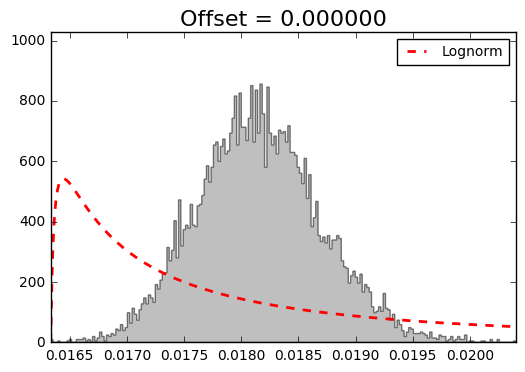

Lognormal Fit params: 
 1.658441, 0.016333, 0.001755
Errors: 
 0.016667643895629, 0.025551990747847
Data Min and Max: 
 0.016333685664411, 0.020400679117330


******************************************************************************************




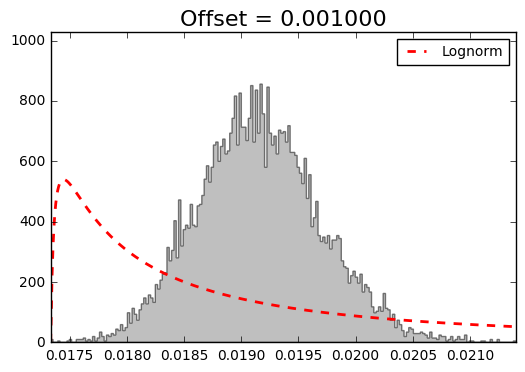

Lognormal Fit params: 
 1.653578, 0.017333, 0.001755
Errors: 
 0.016669150350986, 0.025503868171357
Data Min and Max: 
 0.017333685664411, 0.021400679117330


******************************************************************************************




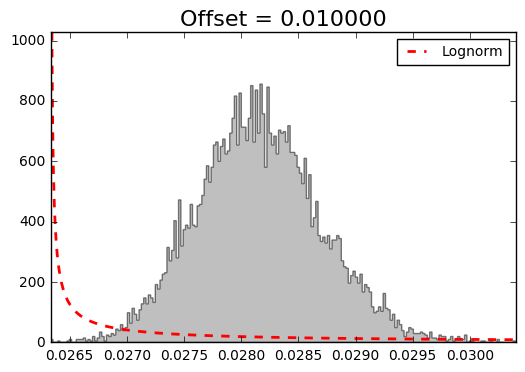

Lognormal Fit params: 
 6.861053, 0.026334, 2.913103
Errors: 
 0.019385609680484, 2780.613676322816445
Data Min and Max: 
 0.026333685664411, 0.030400679117330


******************************************************************************************




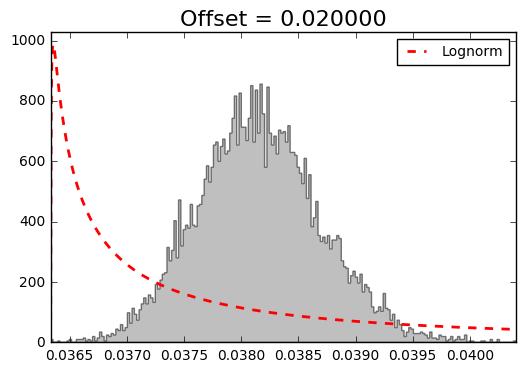

Lognormal Fit params: 
 2.090467, 0.036334, 0.001717
Errors: 
 0.016545704631471, 0.030218382654041
Data Min and Max: 
 0.036333685664411, 0.040400679117330


******************************************************************************************




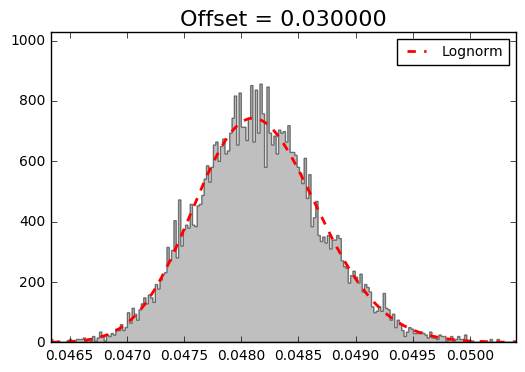

Lognormal Fit params: 
 0.067984, 0.040220, 0.007920
Errors: 
 0.017619007637460, 0.018696667075181
Data Min and Max: 
 0.046333685664411, 0.050400679117330


******************************************************************************************




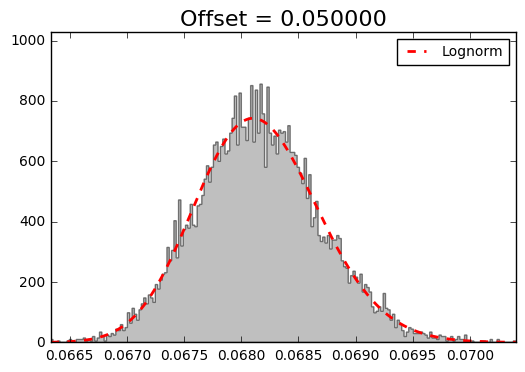

Lognormal Fit params: 
 0.068045, 0.060225, 0.007915
Errors: 
 0.017618948834520, 0.018696936192981
Data Min and Max: 
 0.066333685664411, 0.070400679117330


******************************************************************************************




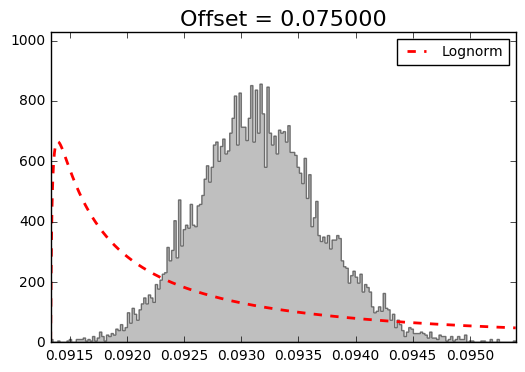

Lognormal Fit params: 
 1.827849, 0.091333, 0.001744
Errors: 
 0.016613737266046, 0.027181313945300
Data Min and Max: 
 0.091333685664411, 0.095400679117330


******************************************************************************************




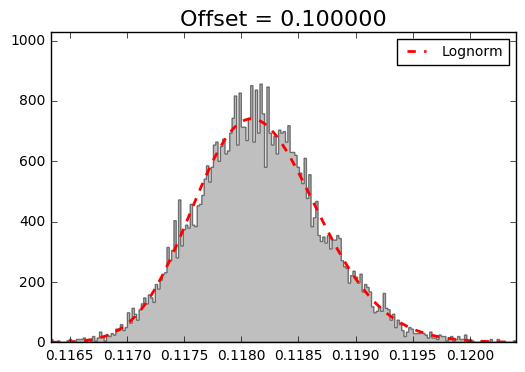

Lognormal Fit params: 
 0.086707, 0.111902, 0.006235
Errors: 
 0.017618859892611, 0.018701431300587
Data Min and Max: 
 0.116333685664411, 0.120400679117330


******************************************************************************************




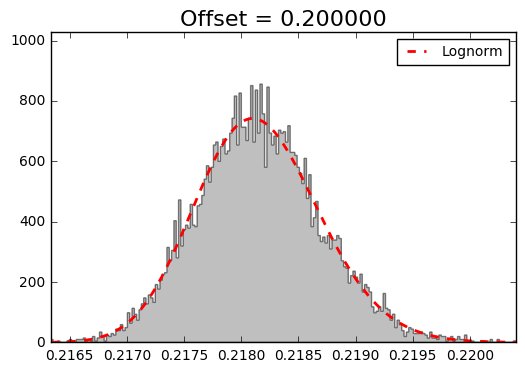

Lognormal Fit params: 
 0.073199, 0.210772, 0.007367
Errors: 
 0.017618957192886, 0.018698397131537
Data Min and Max: 
 0.216333685664411, 0.220400679117330


******************************************************************************************




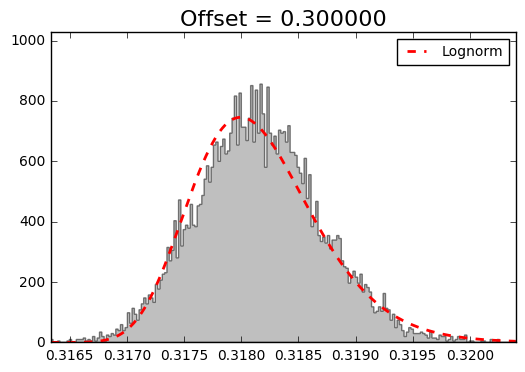

Lognormal Fit params: 
 0.203275, 0.315416, 0.002687
Errors: 
 0.017609135180346, 0.018709061974329
Data Min and Max: 
 0.316333685664411, 0.320400679117330


******************************************************************************************




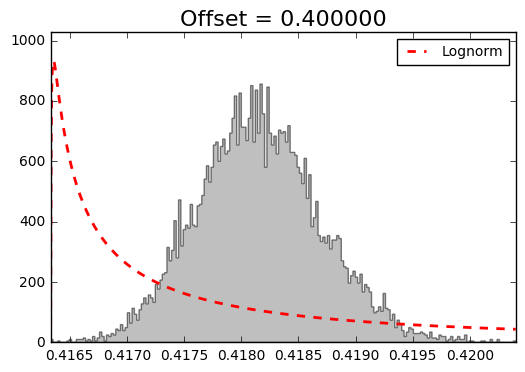

Lognormal Fit params: 
 2.067251, 0.416334, 0.001750
Errors: 
 0.016554942549582, 0.030165642824384
Data Min and Max: 
 0.416333685664411, 0.420400679117330


******************************************************************************************




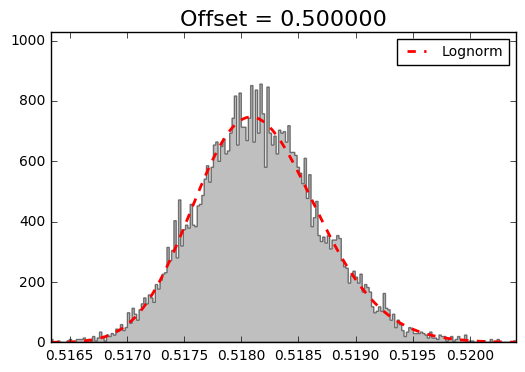

Lognormal Fit params: 
 0.091392, 0.512265, 0.005870
Errors: 
 0.017621815895276, 0.018696198157441
Data Min and Max: 
 0.516333685664411, 0.520400679117330


******************************************************************************************




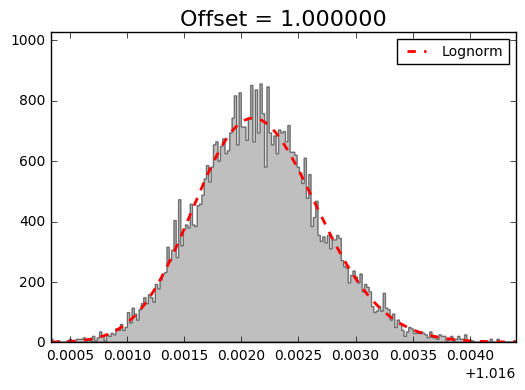

Lognormal Fit params: 
 0.068014, 1.010220, 0.007919
Errors: 
 0.017618921973224, 0.018697015486794
Data Min and Max: 
 1.016333685664411, 1.020400679117330


******************************************************************************************




In [17]:
param   = 'PARAM3'
offsets = [0.0, 0.001, 0.01, 0.02, 0.03, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]

all_errors = OrderedDict()
all_fitpars = OrderedDict()

for i in offsets:
    errors  = None
    fitpars   = None
    offset    = i
    d         = None
    d         = (data[param] + offset)
    d         = np.array(d)
    
    fitpars, errors  = do_plotting(d, i)
    
    print("Lognormal Fit params: \n %f, %f, %f"%(fitpars[0], fitpars[1], fitpars[2]))
    print("Errors: \n %.15f, %.15f"%((errors[0] - offset), (errors[1] - offset)))
    print("Data Min and Max: \n %.15f, %.15f"%(d.min(), d.max())) 
    print("\n")
    print("***"*30)
    print("\n")
    all_errors[i]  = list(errors - offset)
    all_fitpars[i] = fitpars

### Shifting to the RIGHT-- smaller numbers

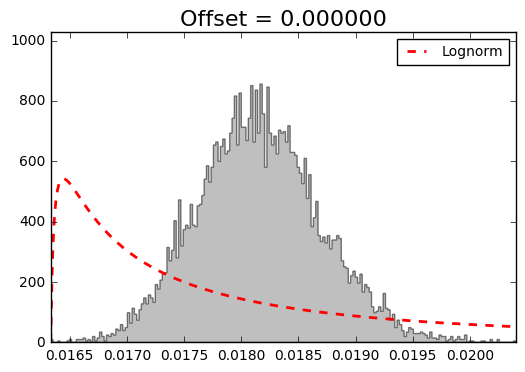

Lognormal Fit params: 
 1.658441, 0.016333, 0.001755
Errors: 
 0.016667643895629, 0.025551990747847
Data Min and Max: 
 0.016333685664411, 0.020400679117330


******************************************************************************************




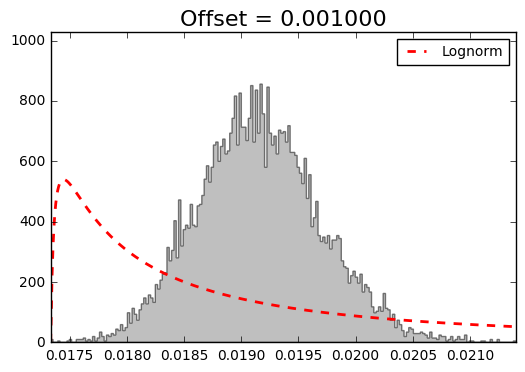

Lognormal Fit params: 
 1.653578, 0.017333, 0.001755
Errors: 
 0.016669150350986, 0.025503868171357
Data Min and Max: 
 0.017333685664411, 0.021400679117330


******************************************************************************************




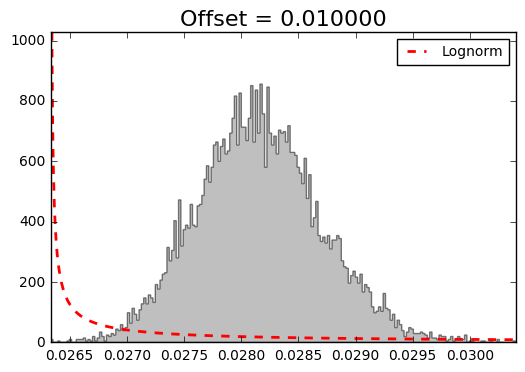

Lognormal Fit params: 
 6.861053, 0.026334, 2.913103
Errors: 
 0.019385609680484, 2780.613676322816445
Data Min and Max: 
 0.026333685664411, 0.030400679117330


******************************************************************************************




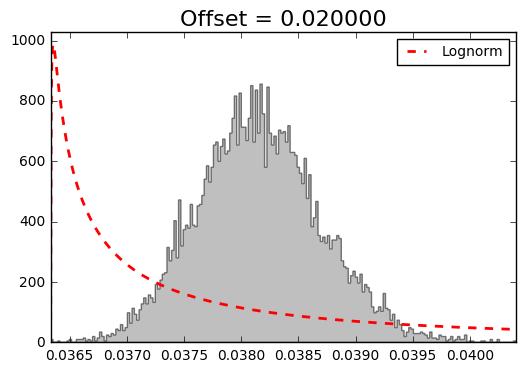

Lognormal Fit params: 
 2.090467, 0.036334, 0.001717
Errors: 
 0.016545704631471, 0.030218382654041
Data Min and Max: 
 0.036333685664411, 0.040400679117330


******************************************************************************************




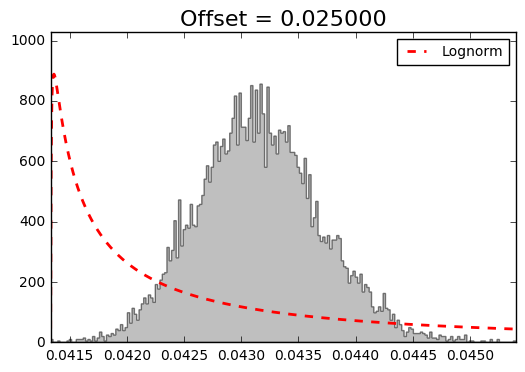

Lognormal Fit params: 
 2.029365, 0.041333, 0.001734
Errors: 
 0.016561350204009, 0.029528202757807
Data Min and Max: 
 0.041333685664411, 0.045400679117330


******************************************************************************************




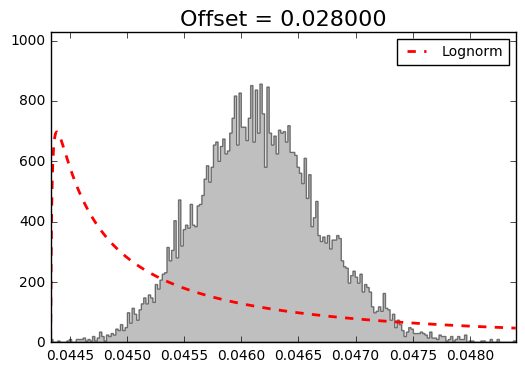

Lognormal Fit params: 
 1.860840, 0.044333, 0.001737
Errors: 
 0.016603528100347, 0.027498776103370
Data Min and Max: 
 0.044333685664411, 0.048400679117330


******************************************************************************************




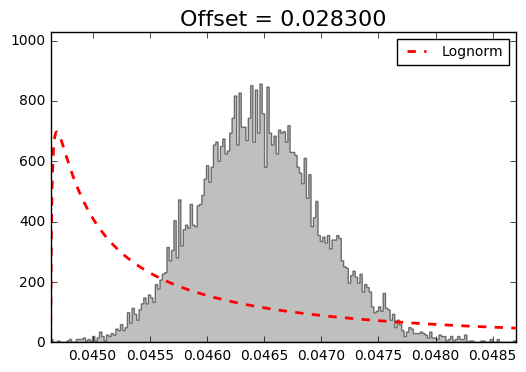

Lognormal Fit params: 
 1.860871, 0.044633, 0.001736
Errors: 
 0.016603475471916, 0.027497224192681
Data Min and Max: 
 0.044633685664411, 0.048700679117330


******************************************************************************************




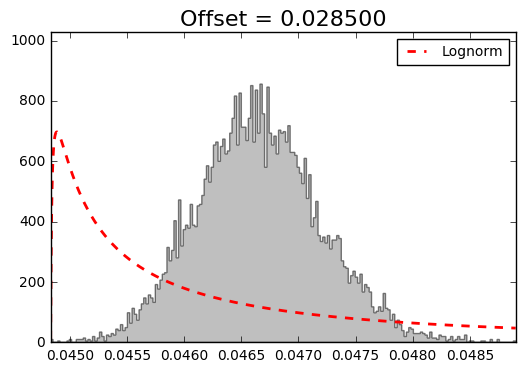

Lognormal Fit params: 
 1.860887, 0.044833, 0.001736
Errors: 
 0.016603466600624, 0.027497297374027
Data Min and Max: 
 0.044833685664411, 0.048900679117330


******************************************************************************************




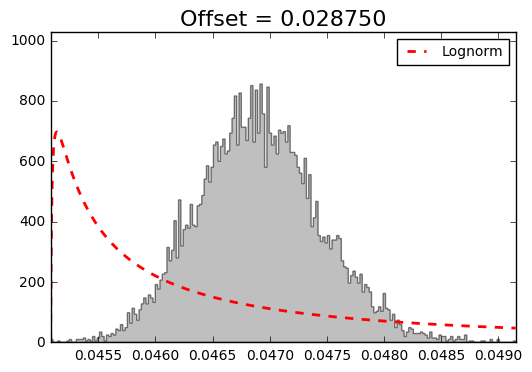

Lognormal Fit params: 
 1.860908, 0.045083, 0.001737
Errors: 
 0.016603543724058, 0.027500903132177
Data Min and Max: 
 0.045083685664411, 0.049150679117330


******************************************************************************************




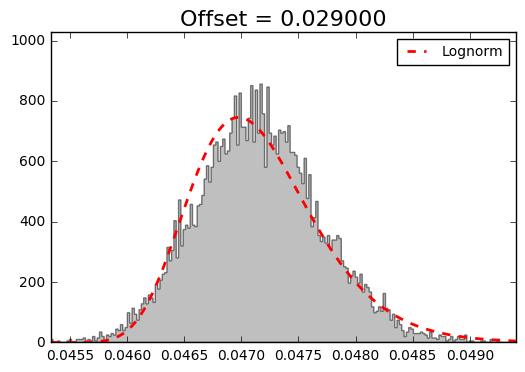

Lognormal Fit params: 
 0.225877, 0.044667, 0.002431
Errors: 
 0.017605948346398, 0.018713398232319
Data Min and Max: 
 0.045333685664411, 0.049400679117330


******************************************************************************************




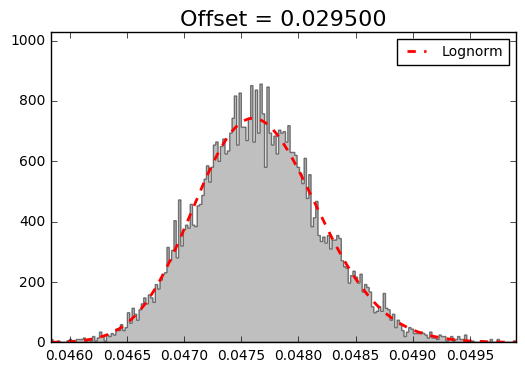

Lognormal Fit params: 
 0.068054, 0.039726, 0.007914
Errors: 
 0.017618916352385, 0.018696930862752
Data Min and Max: 
 0.045833685664411, 0.049900679117330


******************************************************************************************




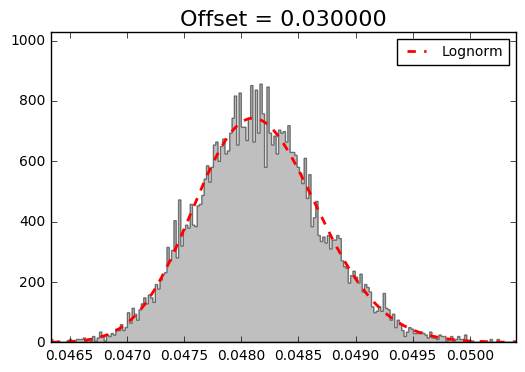

Lognormal Fit params: 
 0.067984, 0.040220, 0.007920
Errors: 
 0.017619007637460, 0.018696667075181
Data Min and Max: 
 0.046333685664411, 0.050400679117330


******************************************************************************************




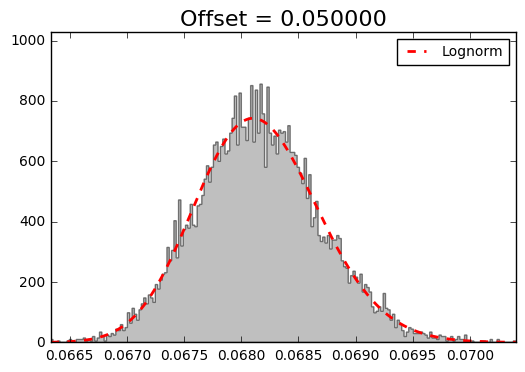

Lognormal Fit params: 
 0.068045, 0.060225, 0.007915
Errors: 
 0.017618948834520, 0.018696936192981
Data Min and Max: 
 0.066333685664411, 0.070400679117330


******************************************************************************************




In [18]:
param   = 'PARAM3'
offsets = [0.0, 0.001, 0.01, 0.02, 0.025, 0.028, 0.0283, 0.0285, 0.02875, 0.029, 0.0295, 0.03, 0.05]

all_errors_1 = OrderedDict()
all_fitpars_1 = OrderedDict()

for i in offsets:
    errors  = None
    fitpars   = None
    offset    = i
    d         = None
    d         = (data[param] + offset)
    d         = np.array(d)
    
    fitpars, errors  = do_plotting(d, i)
    
    print("Lognormal Fit params: \n %f, %f, %f"%(fitpars[0], fitpars[1], fitpars[2]))
    print("Errors: \n %.15f, %.15f"%((errors[0] - offset), (errors[1] - offset)))
    print("Data Min and Max: \n %.15f, %.15f"%(d.min(), d.max())) 
    print("\n")
    print("***"*30)
    print("\n")
    all_errors_1[i]  = list(errors - offset)
    all_fitpars_1[i] = fitpars

---

### Shifting to the LEFT

In [19]:
data['PARAM3'].min()  # Shifting left by this would be the origin.

0.016333685664411082

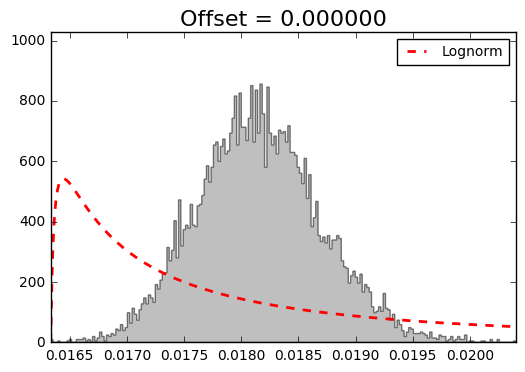

Lognormal Fit params: 
 1.658441, 0.016333, 0.001755
Errors: 
 0.016667643895629, 0.025551990747847
Data Min and Max: 
 0.016333685664411, 0.020400679117330


******************************************************************************************




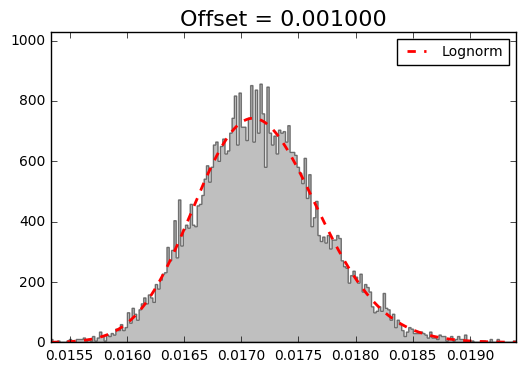

Lognormal Fit params: 
 0.068511, 0.009279, 0.007861
Errors: 
 0.017619580098460, 0.018697537483802
Data Min and Max: 
 0.015333685664411, 0.019400679117330


******************************************************************************************




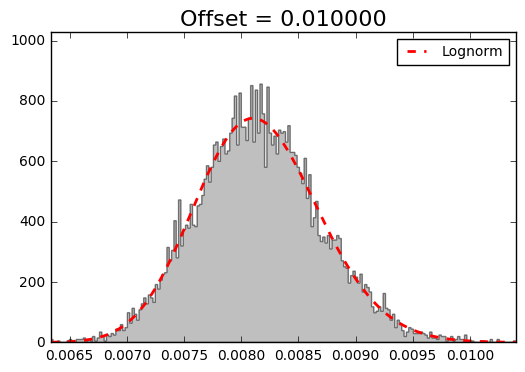

Lognormal Fit params: 
 0.068038, 0.000224, 0.007916
Errors: 
 0.017618911778773, 0.018696936894742
Data Min and Max: 
 0.006333685664411, 0.010400679117330


******************************************************************************************




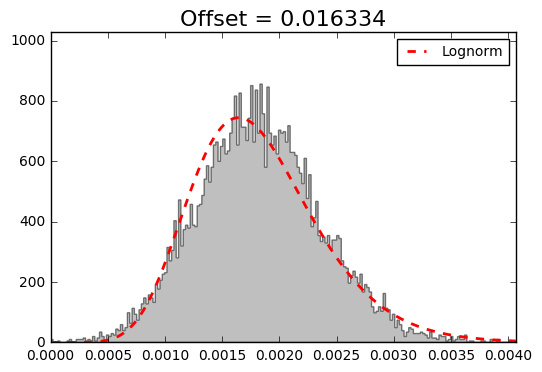

Lognormal Fit params: 
 0.224791, -0.000681, 0.002445
Errors: 
 0.017605473845359, 0.018714029069578
Data Min and Max: 
 0.000000000000000, 0.004066993452919


******************************************************************************************




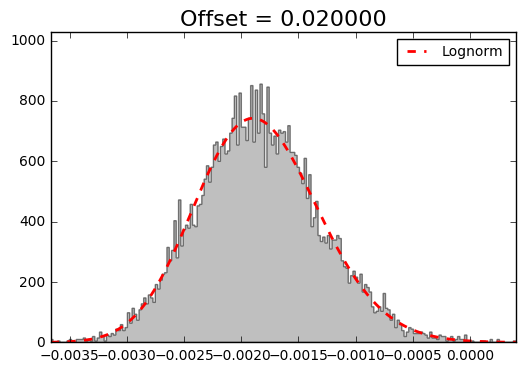

Lognormal Fit params: 
 0.068080, -0.009772, 0.007912
Errors: 
 0.017618917614347, 0.018697001364712
Data Min and Max: 
 -0.003666314335589, 0.000400679117330


******************************************************************************************




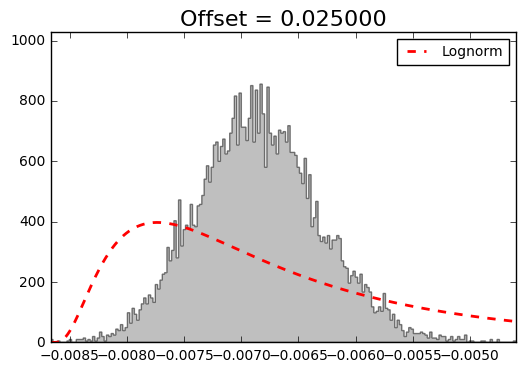

Lognormal Fit params: 
 0.788590, -0.008668, 0.001737
Errors: 
 0.017121752108234, 0.020154393919669
Data Min and Max: 
 -0.008666314335589, -0.004599320882670


******************************************************************************************




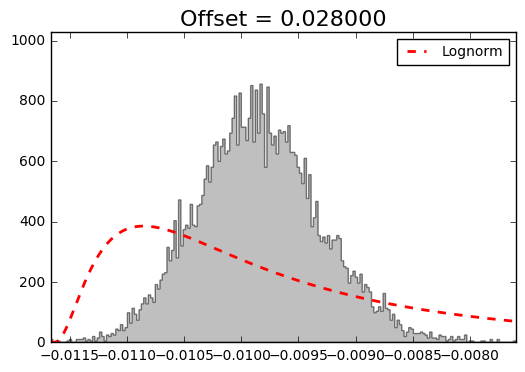

Lognormal Fit params: 
 0.870524, -0.011668, 0.001737
Errors: 
 0.017059646577107, 0.020480096686292
Data Min and Max: 
 -0.011666314335589, -0.007599320882670


******************************************************************************************




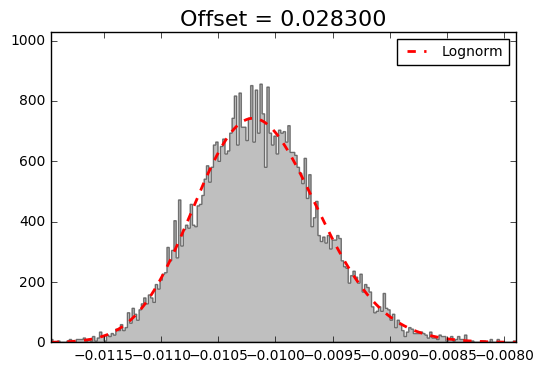

Lognormal Fit params: 
 0.068049, -0.018075, 0.007915
Errors: 
 0.017618892738058, 0.018696955961242
Data Min and Max: 
 -0.011966314335589, -0.007899320882670


******************************************************************************************




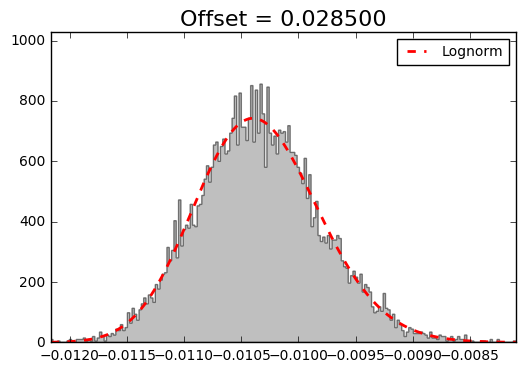

Lognormal Fit params: 
 0.068052, -0.018275, 0.007914
Errors: 
 0.017618880801077, 0.018696936246595
Data Min and Max: 
 -0.012166314335589, -0.008099320882670


******************************************************************************************




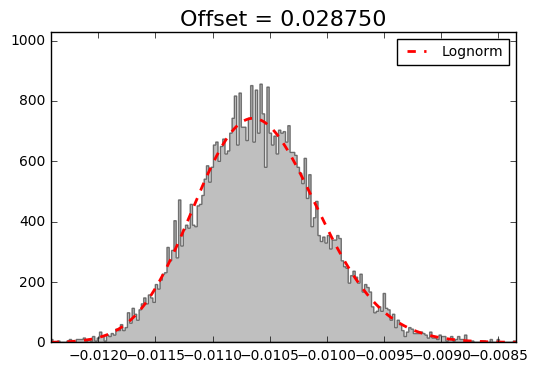

Lognormal Fit params: 
 0.068001, -0.018531, 0.007921
Errors: 
 0.017618919706222, 0.018697022993405
Data Min and Max: 
 -0.012416314335589, -0.008349320882670


******************************************************************************************




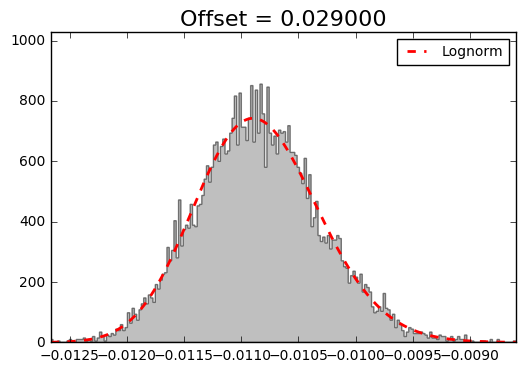

Lognormal Fit params: 
 0.068001, -0.018781, 0.007921
Errors: 
 0.017618905479040, 0.018696976426380
Data Min and Max: 
 -0.012666314335589, -0.008599320882670


******************************************************************************************




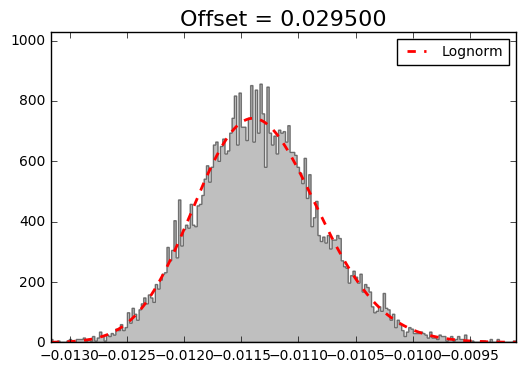

Lognormal Fit params: 
 0.068021, -0.019279, 0.007919
Errors: 
 0.017618956367213, 0.018697064890754
Data Min and Max: 
 -0.013166314335589, -0.009099320882670


******************************************************************************************




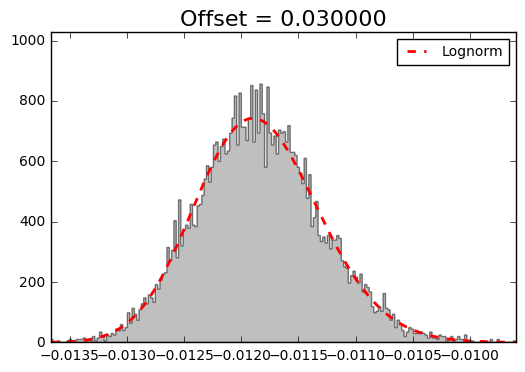

Lognormal Fit params: 
 0.068077, -0.019772, 0.007912
Errors: 
 0.017618918091290, 0.018697012195589
Data Min and Max: 
 -0.013666314335589, -0.009599320882670


******************************************************************************************




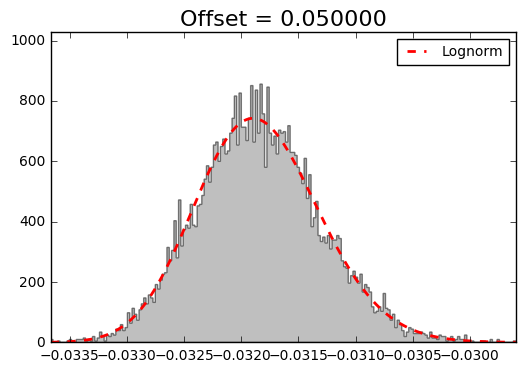

Lognormal Fit params: 
 0.068051, -0.039776, 0.007915
Errors: 
 0.017618898125350, 0.018697021652546
Data Min and Max: 
 -0.033666314335589, -0.029599320882670


******************************************************************************************




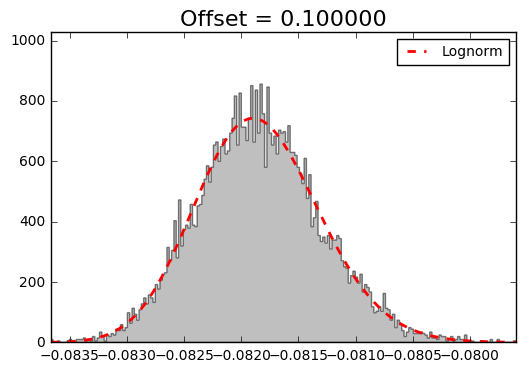

Lognormal Fit params: 
 0.068013, -0.089779, 0.007919
Errors: 
 0.017618953546033, 0.018696993195872
Data Min and Max: 
 -0.083666314335589, -0.079599320882670


******************************************************************************************




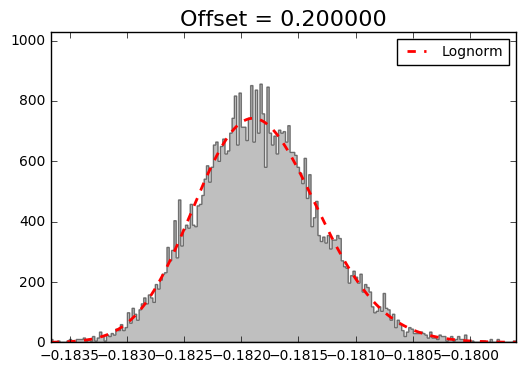

Lognormal Fit params: 
 0.068019, -0.189779, 0.007919
Errors: 
 0.017618920605407, 0.018697025973794
Data Min and Max: 
 -0.183666314335589, -0.179599320882670


******************************************************************************************




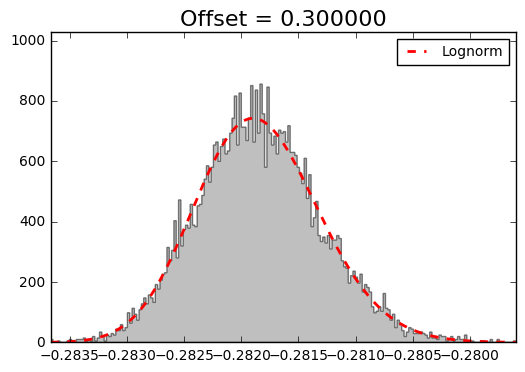

Lognormal Fit params: 
 0.068124, -0.289767, 0.007906
Errors: 
 0.017618921944581, 0.018696993472729
Data Min and Max: 
 -0.283666314335589, -0.279599320882670


******************************************************************************************




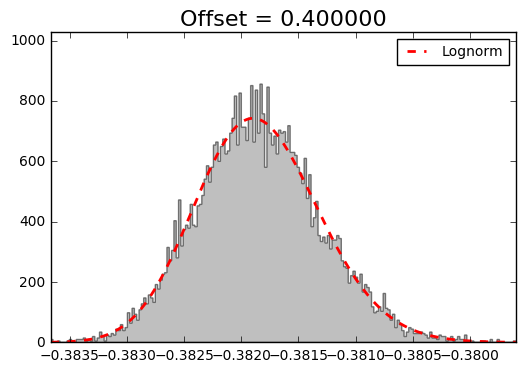

Lognormal Fit params: 
 0.068056, -0.389775, 0.007914
Errors: 
 0.017618923449741, 0.018697031165716
Data Min and Max: 
 -0.383666314335589, -0.379599320882670


******************************************************************************************




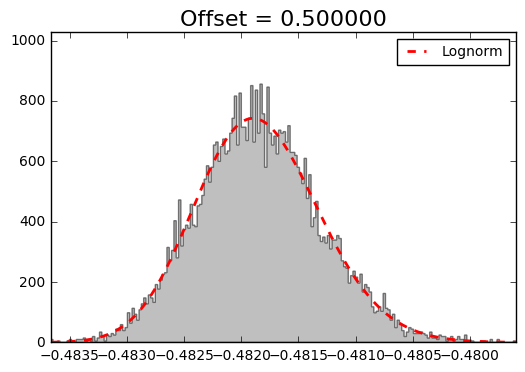

Lognormal Fit params: 
 0.068020, -0.489779, 0.007918
Errors: 
 0.017618926645981, 0.018696992762715
Data Min and Max: 
 -0.483666314335589, -0.479599320882670


******************************************************************************************




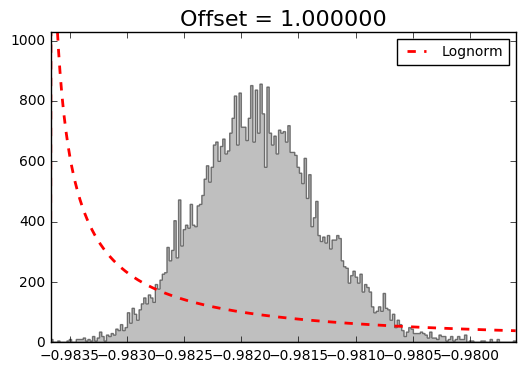

Lognormal Fit params: 
 2.374468, -0.983666, 0.001743
Errors: 
 0.016495761767978, 0.035062928584218
Data Min and Max: 
 -0.983666314335589, -0.979599320882670


******************************************************************************************




In [20]:
param   = 'PARAM3'
DataMin = data['PARAM3'].min()
offsets = [0.0, 0.001, 0.01, DataMin, 0.02, 0.025, 0.028, 0.0283, 0.0285, 0.02875, 0.029, 0.0295, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]

all_errors_2  = OrderedDict()
all_fitpars_2 = OrderedDict()

for i in offsets:
    errors  = None
    fitpars   = None
    offset    = i
    d         = None
    d         = (data[param] - offset)
    d         = np.array(d)
    
    fitpars, errors  = do_plotting(d, i)
    
    print("Lognormal Fit params: \n %f, %f, %f"%(fitpars[0], fitpars[1], fitpars[2]))
    print("Errors: \n %.15f, %.15f"%((errors[0] + offset), (errors[1] + offset)))
    print("Data Min and Max: \n %.15f, %.15f"%(d.min(), d.max())) 
    print("\n")
    print("***"*30)
    print("\n")
    all_errors_2[i] = list(errors + offset)
    all_fitpars_2[i] = fitpars

You can see that when either the minimum data value or the maximum data value is close to 0, the lognormal function acts funny.  However, if it over laps the origin, as it does when we shifted the data to the LEFT by offset = 0.2 giving us a minimum data value that is negative and a maximum data value that is positive:
    
    Data Min and Max: 
     -0.003666314335589, 0.000400679117330
     
This is strange.
 
 

In [21]:
all_errors

OrderedDict([(0.0, [0.016667643895628602, 0.025551990747846854]),
             (0.001, [0.016669150350985613, 0.025503868171356834]),
             (0.01, [0.019385609680483876, 2780.6136763228164]),
             (0.02, [0.016545704631470735, 0.03021838265404134]),
             (0.03, [0.017619007637459501, 0.018696667075180501]),
             (0.05, [0.01761894883451981, 0.018696936192981434]),
             (0.075, [0.016613737266045647, 0.027181313945299643]),
             (0.1, [0.017618859892611236, 0.018701431300586935]),
             (0.2, [0.017618957192886114, 0.018698397131537425]),
             (0.3, [0.017609135180346014, 0.018709061974329311]),
             (0.4, [0.016554942549581897, 0.030165642824383998]),
             (0.5, [0.017621815895276116, 0.018696198157440946]),
             (1.0, [0.017618921973224344, 0.018697015486794255])])

In [22]:
all_errors_1

OrderedDict([(0.0, [0.016667643895628602, 0.025551990747846854]),
             (0.001, [0.016669150350985613, 0.025503868171356834]),
             (0.01, [0.019385609680483876, 2780.6136763228164]),
             (0.02, [0.016545704631470735, 0.03021838265404134]),
             (0.025, [0.016561350204009236, 0.029528202757806994]),
             (0.028, [0.016603528100346935, 0.027498776103370117]),
             (0.0283, [0.016603475471916249, 0.027497224192680657]),
             (0.0285, [0.016603466600623677, 0.027497297374026699]),
             (0.02875, [0.016603543724058475, 0.027500903132177377]),
             (0.029, [0.017605948346398403, 0.018713398232319194]),
             (0.0295, [0.017618916352385341, 0.018696930862751517]),
             (0.03, [0.017619007637459501, 0.018696667075180501]),
             (0.05, [0.01761894883451981, 0.018696936192981434])])

In [23]:
all_errors_2

OrderedDict([(0.0, [0.016667643895628602, 0.025551990747846854]),
             (0.001, [0.017619580098459681, 0.018697537483801617]),
             (0.01, [0.017618911778772874, 0.018696936894741674]),
             (0.016333685664411082,
              [0.017605473845358991, 0.018714029069578163]),
             (0.02, [0.017618917614347161, 0.018697001364711717]),
             (0.025, [0.017121752108234037, 0.020154393919669208]),
             (0.028, [0.017059646577106978, 0.020480096686291818]),
             (0.0283, [0.017618892738057501, 0.01869695596124181]),
             (0.0285, [0.017618880801076698, 0.01869693624659468]),
             (0.02875, [0.017618919706222053, 0.018697022993404817]),
             (0.029, [0.017618905479040197, 0.018696976426380012]),
             (0.0295, [0.017618956367213154, 0.018697064890753779]),
             (0.03, [0.017618918091290278, 0.018697012195589308]),
             (0.05, [0.017618898125350294, 0.018697021652546011]),
             (0.1, [0.